In [710]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score

import warnings
warnings.filterwarnings("ignore")

In [711]:
#6 seasons of data from 2018 - 2023
matches = pd.read_csv("data\matches_two.csv")

In [712]:
matches.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2022-08-13,21:00,La Liga,Matchweek 1,Sat,Home,D,0.0,0.0,...,Match Report,NaN,21.0,5.0,17.0,1.0,0.0,0.0,2023,Barcelona
1,1,2022-08-21,22:00,La Liga,Matchweek 2,Sun,Away,W,4.0,1.0,...,Match Report,NaN,15.0,7.0,14.6,0.0,0.0,0.0,2023,Barcelona
2,2,2022-08-28,19:30,La Liga,Matchweek 3,Sun,Home,W,4.0,0.0,...,Match Report,NaN,24.0,9.0,14.4,1.0,0.0,0.0,2023,Barcelona
3,3,2022-09-03,21:00,La Liga,Matchweek 4,Sat,Away,W,3.0,0.0,...,Match Report,NaN,18.0,5.0,16.0,2.0,0.0,0.0,2023,Barcelona
4,5,2022-09-10,18:30,La Liga,Matchweek 5,Sat,Away,W,4.0,0.0,...,Match Report,NaN,16.0,8.0,14.9,0.0,0.0,0.0,2023,Barcelona


In [713]:
#We don't need the 'unamed:0' column so we'll drop it
matches.drop('Unnamed: 0', axis=1, inplace=True)

In [714]:
#dataset has 27 columns
matches.shape  

(4322, 27)

In [715]:
print(matches.columns)
print(matches.index)

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team'],
      dtype='object')
RangeIndex(start=0, stop=4322, step=1)


In [716]:
matches.describe().T

,count,mean,std,min,25%,50%,75%,max
gf,4322.0,1.269088,1.177594,0.0,0.0,1.0,2.0,8.0
ga,4322.0,1.269088,1.177594,0.0,0.0,1.0,2.0,8.0
xg,4322.0,1.276377,0.770913,0.0,0.7,1.1,1.7,5.6
xga,4322.0,1.276377,0.770913,0.0,0.7,1.1,1.7,5.6
poss,4322.0,50.000925,11.197786,18.0,42.0,50.0,58.0,82.0
attendance,3346.0,26815.921100,18924.324548,13.0,13247.0,19161.0,37972.0,97939.0
notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sh,4322.0,11.491439,4.677475,0.0,8.0,11.0,14.0,36.0
sot,4322.0,3.798473,2.261921,0.0,2.0,3.0,5.0,17.0
dist,4320.0,18.362986,3.376990,4.8,16.1,18.2,20.2,46.2


`Observations`
We can tell the average goals per game is 1 which indicates not many goals are scored in the matches. The goals scored ranges from 0 to 8. Average shots attempted per game is about 11 but average shots on target is about 4 which indicates that in this League, many shots doesn't get converted into goals. Minimum attendance at a game was 13 which is way below the standard capacity of a stadium. I'm pretty sure this will be coming from the 2019/2020 during the Covid-19 pandemic when spectators were banned from attending matches at some point so that makes sense. We can also see a lot of shots are being taken 18 yards away which is expected. The 18 yard box is usually heavily guarded by defenders of the opposition which makes it difficult to penetrate so most players who want to score will attempt to shoot from 18 years way which explains why the average distance is 18 yards. On rare occassions do players have the priviledge to shoot from less than 18 yards like you can see min distance is 4.8 yards and we can see some ambitious attempts at goal from 46 yards away.

In [717]:
matches['team'].value_counts()

Barcelona              216
Getafe                 216
Atletico Madrid        216
Real Sociedad          216
Real Betis             216
Villarreal             216
Athletic Club          216
Valencia               216
Celta Vigo             216
Real Madrid            216
Sevilla                216
Alaves                 190
Levante                190
Espanyol               178
Eibar                  152
Osasuna                141
Valladolid             140
Granada                114
Leganes                114
Mallorca               103
Cadiz                  102
Elche                  102
Girona                 102
Rayo Vallecano         102
Huesca                  76
Deportivo La Coruna     38
Las Palmas              38
Malaga                  38
Almeria                 26
Name: team, dtype: int64

`NOTE`

There are 20 teams participating in the League per season/year. It's round robin and each team gets to host their opponent so teams play each other twice. This means each team has 19*2 ie 38 games per season. We have 6 seasons of data so ideally each club should have 226 (38 * 6) games in our sampled data set. The current 2023 season is still ongoing. As at the time of this analysis, 26 matches have been played per team so far which explains why we're seeing 216 instead of 226. we can see, 11 teams have 216 games over the 6 seasons which means they have played the maximum number of matches over the 6 seasons. <br>

In the La Liga, at the end of every season, 4 teams at the bottom of the league gets relegated to a lower division meaning they won't be participating in the next season's competition. These 4 teams get replaced with another set of 4 teams who have been promoted from the lower division. This is why our list of teams above is 29 instead of 20. Only if they perform well in the lower division do they get to be promoted to to participate in the next season of the competition. This explains why some teams have lower than 216 matches over the 6 seasons we have sampled. For instance, Almeria has 26 matches only meaning they haven't participated in the last 5 seasons of the La Liga. Deportivo La Coruna, Las Palmas, Malaga has 38 matches meaning they have participated in a previous season and but not the current one. Huesca has 76 matches meaning they have participated in two of the last 6 seasons. Cadiz, Elche, Girona has 102 matches because they are currently in the ongoing season with 26 matches and participated in 2 of the previous 5 seasons as well - ((38 * 2) + 26 ). <br>

Now we know why we have more than than 20 unique teams in our sample and why we're missing match data for some of the teams.





In [718]:
matches['season'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018], dtype=int64)

In [719]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          4322 non-null   object 
 1   time          4322 non-null   object 
 2   comp          4322 non-null   object 
 3   round         4322 non-null   object 
 4   day           4322 non-null   object 
 5   venue         4322 non-null   object 
 6   result        4322 non-null   object 
 7   gf            4322 non-null   float64
 8   ga            4322 non-null   float64
 9   opponent      4322 non-null   object 
 10  xg            4322 non-null   float64
 11  xga           4322 non-null   float64
 12  poss          4322 non-null   float64
 13  attendance    3346 non-null   float64
 14  captain       4322 non-null   object 
 15  formation     4322 non-null   object 
 16  referee       4322 non-null   object 
 17  match report  4322 non-null   object 
 18  notes         0 non-null    

Most of the columns are not in the correct datatype so we'll convert them. Also, we're create new columns for use in the model. <br>

1. venue_code -> 1 for home and 0 for away. match outcomes can be influenced by whether you're a visitor or host. <br>
2. opp_code -> each opponent will have a unique number. <br>
3. hour -> we'll extract the hour from time. maybe some teams play better at some times. <br>
3. day_code -> creates categorical values for days of the week. Monday=0, Sunday=6 <br>
4. target -> this is what we want to predict. <br>


In [720]:
matches["date"] = pd.to_datetime(matches["date"])
matches['venue_code'] = matches['venue'].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
matches['day_code'] = matches["date"].dt.dayofweek
#matches['target'] = matches["result"].astype("category").cat.codes 
matches['target'] = (matches['result'] == "W").astype('int')
matches["team_code"] = matches["team"].astype("category").cat.codes

`NOTE`: We derived venue_code, opp_code, hour, day_code, target, and team_code from the venue, opponent, time, day, result and team columns respectively. <br>

venue_code - whether a team is hosting a game or visiting can have an impact on the outcome of a game <br>
opp_code - the opponent has an impact on the outcome. all opponents have a unique code <br>
hour - time of play can impact the outcome. some teams might perform better at certain times of the day <br>
day_code - day of play can have an impact on the outcome of a game <br>
team_code - team of which stats we're looking at <br>
target - final outcome of a game. I considered Win(W) or Lose(L). I combined Draw and Lose. 1 for W and 0 for L <br>

In [721]:
matches['target'].unique()

array([0, 1])

In [722]:
matches['day_code'].unique()

array([5, 6, 3, 1, 2, 0, 4], dtype=int64)

In [723]:
matches.opp_code.unique()

array([22, 24, 27, 25,  7,  9, 19,  6, 23, 28,  2, 26,  1, 21, 10,  3, 11,
       12,  5,  4,  0, 18, 13, 14,  8, 17, 16, 20, 15], dtype=int8)

In [724]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target,team_code
0,2022-08-13,21:00,La Liga,Matchweek 1,Sat,Home,D,0.0,0.0,Rayo Vallecano,...,0.0,0.0,2023,Barcelona,1,22,21,5,0,4
1,2022-08-21,22:00,La Liga,Matchweek 2,Sun,Away,W,4.0,1.0,Real Sociedad,...,0.0,0.0,2023,Barcelona,0,24,22,6,1,4
2,2022-08-28,19:30,La Liga,Matchweek 3,Sun,Home,W,4.0,0.0,Valladolid,...,0.0,0.0,2023,Barcelona,1,27,19,6,1,4
3,2022-09-03,21:00,La Liga,Matchweek 4,Sat,Away,W,3.0,0.0,Sevilla,...,0.0,0.0,2023,Barcelona,0,25,21,5,1,4
4,2022-09-10,18:30,La Liga,Matchweek 5,Sat,Away,W,4.0,0.0,Cádiz,...,0.0,0.0,2023,Barcelona,0,7,18,5,1,4


In [725]:
matches.isna().sum()

date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       976
captain            0
formation          0
referee            0
match report       0
notes           4322
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
venue_code         0
opp_code           0
hour               0
day_code           0
target             0
team_code          0
dtype: int64

In [726]:
matches[matches['attendance'].isnull()]['season'].unique()

array([2021, 2020, 2018], dtype=int64)

`NOTE`: Missing data for attendance is coming from the 2020 and 2021 season. This was as a result of restrictions during the Covid-19 pandemic. Spectators were banned from attending games at some point in time.

In [727]:
matches['dist'].fillna(matches['dist'].mean(), inplace=True)

In [728]:
matches.isna().sum()

date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       976
captain            0
formation          0
referee            0
match report       0
notes           4322
sh                 0
sot                0
dist               0
fk                 0
pk                 0
pkatt              0
season             0
team               0
venue_code         0
opp_code           0
hour               0
day_code           0
target             0
team_code          0
dtype: int64

In [730]:
matches['attendance'].fillna(0, inplace=True)

Text(0.5, 1.0, 'Match Outcomes Overview')

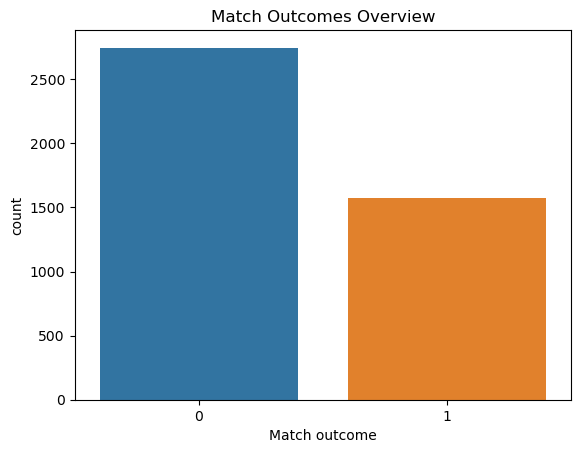

In [731]:
sns.countplot(x=matches['target'])
plt.xlabel('Match outcome')
plt.title("Match Outcomes Overview")

`NOTE`: It appears there are as more loses than wins in the dataset almost twice as many loses than wins.

Text(0.5, 1.0, 'Match Frequencies based on days of the week')

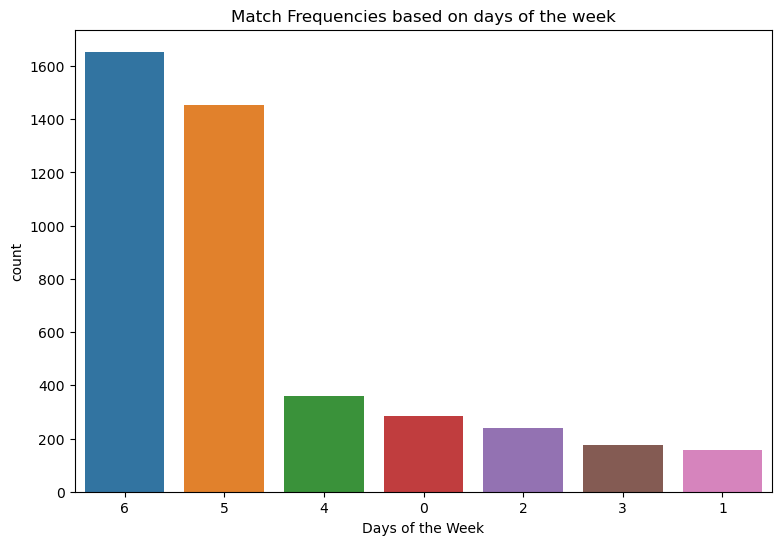

In [732]:
plt.figure(figsize=(9,6))
sns.countplot(matches, x='day_code', order=matches["day_code"].value_counts().index)
#plt.xticks(np.arange(7), ['Monday', "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Days of the Week")
plt.title("Match Frequencies based on days of the week")

`NOTE`: It appears most matches are scheduled on Saturdays and Sundays. <br> let's see the distribution of goals over the 6 seasons using the the displot

Text(0.5, 1.0, 'Distribution of goals')

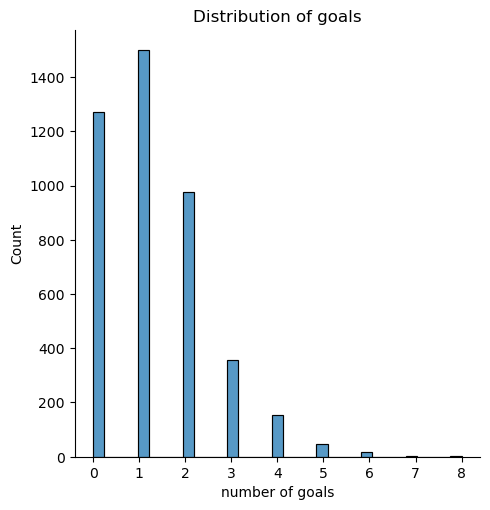

In [733]:
sns.displot(x='gf', data=matches)
plt.xlabel('number of goals')
plt.title('Distribution of goals')

It looks like most matches ends up with single goals or goaless. Rarely does 6 or more goals occur in a match. <br> 
it appears this league doesn't produce a lot of goals.

## The Models
### 1. Random Forest

In [735]:
predictors = ["venue_code", 'opp_code', 'hour', 'day_code', 'team_code']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(matches[predictors], matches['target'], test_size=0.3, random_state=101)

In [736]:
#randomforest can pick up non linear relationship better
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=4, max_features='sqrt',  random_state=101)  #min_samples_split=10,
rf.fit(X_train, y_train)  

RandomForestClassifier(n_estimators=4, random_state=101)

In [737]:
#predictions
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
acc = accuracy_score(y_test, y_pred)
acc

0.643793369313801

In [738]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       849
           1       0.48      0.37      0.42       448

    accuracy                           0.64      1297
   macro avg       0.59      0.58      0.58      1297
weighted avg       0.63      0.64      0.63      1297



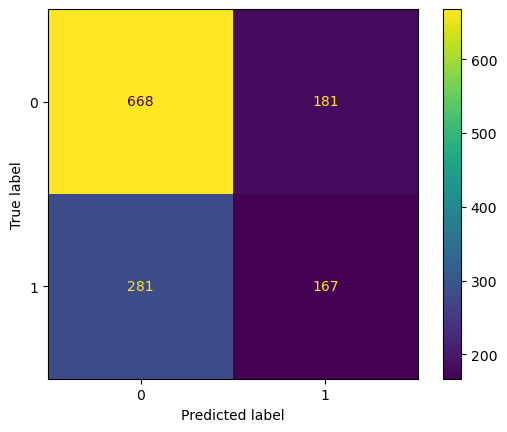

In [739]:
cm = confusion_matrix(y_test, y_pred)
# labels = ['D', 'L', 'W']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()
plt.show()


`NOTE`: When we predicted WIN, we were right, 48% of the time. when we predicted a loss we were right 70% percent of the time.

### Let's add some predictors

In [741]:
#Grouping matches by team. We use Barcelona here.
grouped_matches = matches.groupby('team')
group = grouped_matches.get_group('Barcelona')
group # all matches by Barcelona  

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target,team_code
0,2022-08-13,21:00,La Liga,Matchweek 1,Sat,Home,D,0.0,0.0,Rayo Vallecano,...,0.0,0.0,2023,Barcelona,1,22,21,5,0,4
1,2022-08-21,22:00,La Liga,Matchweek 2,Sun,Away,W,4.0,1.0,Real Sociedad,...,0.0,0.0,2023,Barcelona,0,24,22,6,1,4
2,2022-08-28,19:30,La Liga,Matchweek 3,Sun,Home,W,4.0,0.0,Valladolid,...,0.0,0.0,2023,Barcelona,1,27,19,6,1,4
3,2022-09-03,21:00,La Liga,Matchweek 4,Sat,Away,W,3.0,0.0,Sevilla,...,0.0,0.0,2023,Barcelona,0,25,21,5,1,4
4,2022-09-10,18:30,La Liga,Matchweek 5,Sat,Away,W,4.0,0.0,Cádiz,...,0.0,0.0,2023,Barcelona,0,7,18,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,2018-04-29,20:45,La Liga,Matchweek 35,Sun,Away,W,4.0,2.0,La Coruña,...,0.0,0.0,2018,Barcelona,0,15,20,6,1,4
3596,2018-05-06,20:45,La Liga,Matchweek 36,Sun,Home,D,2.0,2.0,Real Madrid,...,0.0,0.0,2018,Barcelona,1,23,20,6,0,4
3597,2018-05-09,20:00,La Liga,Matchweek 34,Wed,Home,W,5.0,1.0,Villarreal,...,0.0,0.0,2018,Barcelona,1,28,20,2,1,4
3598,2018-05-13,20:45,La Liga,Matchweek 37,Sun,Away,L,4.0,5.0,Levante,...,1.0,1.0,2018,Barcelona,0,18,20,6,0,4


In [742]:
#calculating the moving average for the numeric statistics for 3 previous games for each team
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean() 
    group[new_cols] = rolling_stats      
    group = group.dropna(subset=new_cols) 
    return group

In [743]:
#We derived 8 new features.
cols = ['gf', 'ga', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']
new_cols = [f"{c}_rolling" for c in cols] 

In [744]:
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [745]:
rolling_averages(group, cols, new_cols)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,target,team_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
3565,2017-09-16,16:15,La Liga,Matchweek 4,Sat,Away,W,2.0,1.0,Getafe,...,1,4,3.000000,0.000000,19.000000,7.000000,17.600000,2.333333,0.000000,0.333333
3566,2017-09-19,22:00,La Liga,Matchweek 5,Tue,Home,W,6.0,1.0,Eibar,...,1,4,3.000000,0.333333,16.333333,8.000000,17.866667,1.666667,0.000000,0.333333
3567,2017-09-23,20:45,La Liga,Matchweek 6,Sat,Away,W,3.0,0.0,Girona,...,1,4,4.333333,0.666667,12.333333,7.666667,17.466667,1.666667,0.333333,0.333333
3568,2017-10-01,16:15,La Liga,Matchweek 7,Sun,Home,W,3.0,0.0,Las Palmas,...,1,4,3.666667,0.666667,8.666667,6.333333,19.166667,1.333333,0.333333,0.333333
3569,2017-10-14,20:45,La Liga,Matchweek 8,Sat,Away,D,1.0,1.0,Atlético Madrid,...,0,4,4.000000,0.333333,13.666667,8.000000,17.466667,2.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,2023-02-19,21:00,La Liga,Matchweek 22,Sun,Home,W,2.0,0.0,Cádiz,...,1,4,2.000000,0.333333,11.666667,4.666667,13.766667,0.666667,0.000000,0.000000
22,2023-02-26,18:30,La Liga,Matchweek 23,Sun,Away,L,0.0,1.0,Almería,...,0,4,2.000000,0.000000,12.666667,5.000000,13.466667,0.333333,0.000000,0.000000
23,2023-03-05,16:15,La Liga,Matchweek 24,Sun,Home,W,1.0,0.0,Valencia,...,1,4,1.000000,0.333333,11.666667,3.000000,12.733333,0.000000,0.000000,0.000000
24,2023-03-12,21:00,La Liga,Matchweek 25,Sun,Away,W,1.0,0.0,Athletic Club,...,1,4,1.000000,0.333333,13.666667,3.000000,15.566667,0.666667,0.000000,0.333333


In [746]:
matches_rolling = matches.groupby('team').apply(lambda x: rolling_averages(x, cols, new_cols))

`NOTE`: With the 8 features added to our matches dataframe, we have a new dataframe called matches_rolling

In [747]:

matches_rolling

date   time     comp         round  day venue result  \
team                                                                         
Alaves     4059 2017-09-17  12:00  La Liga   Matchweek 4  Sun  Home      L   
           4060 2017-09-20  21:00  La Liga   Matchweek 5  Wed  Away      L   
           4061 2017-09-23  16:15  La Liga   Matchweek 6  Sat  Home      L   
           4062 2017-09-30  18:30  La Liga   Matchweek 7  Sat  Away      W   
           4063 2017-10-14  18:30  La Liga   Matchweek 8  Sat  Home      L   
...                    ...    ...      ...           ...  ...   ...    ...   
Villarreal 151  2023-02-18  18:30  La Liga  Matchweek 22  Sat  Away      L   
           152  2023-02-27  21:00  La Liga  Matchweek 23  Mon  Home      W   
           153  2023-03-04  16:15  La Liga  Matchweek 24  Sat  Away      W   
           154  2023-03-12  18:30  La Liga  Matchweek 25  Sun  Home      D   
           155  2023-03-19  16:15  La Liga  Matchweek 26  Sun  Away      W   

                  gf   ga       opponent  ...  target  team_code  gf_rolling  \
team                                      ...                                  
Alaves     4059  0.0  3.0     Villarreal  ...       0          0    0.000000   
           4060  0.0  1.0      La Coruña  ...       0          0    0.000000   
           4061  1.0  2.0    Real Madrid  ...       0          0    0.000000   
           4062  2.0  0.0        Levante  ...       1          0    0.333333   
           4063  0.0  2.0  Real Sociedad  ...       0          0    1.000000   
...              ...  ...            ...  ...     ...        ...         ...   
Villarreal 151   2.0  4.0       Mallorca  ...       0         28    0.333333   
           152   2.0  1.0         Getafe  ...       1         28    1.000000   
           153   2.0  0.0        Almería  ...       1         28    1.333333   
           154   1.0  1.0          Betis  ...       0         28    2.000000   
           155   3.0  0.0        Osasuna  ...       1         28    1.666667   

                 ga_rolling sh_rolling sot_rolling dist_rolling fk_rolling  \
team                                                                         
Alaves     4059    1.333333   8.000000    3.000000    20.066667   0.666667   
           4060    2.000000  10.666667    2.333333    20.533333   1.000000   
           4061    1.666667   9.666667    2.666667    20.200000   0.333333   
           4062    2.000000  10.666667    2.666667    21.233333   0.666667   
           4063    1.000000   8.000000    3.000000    17.633333   0.666667   
...                     ...        ...         ...          ...        ...   
Villarreal 151     1.666667  12.333333    2.333333    17.900000   0.333333   
           152     2.666667  11.000000    2.666667    17.933333   0.000000   
           153     2.000000  10.000000    3.666667    17.800000   0.333333   
           154     1.666667  12.000000    5.000000    16.966667   0.333333   
           155     0.666667  14.333333    5.000000    16.000000   0.666667   

                 pk_rolling  pkatt_rolling  
team                                        
Alaves     4059         0.0       0.333333  
           4060         0.0       0.000000  
           4061         0.0       0.000000  
           4062         0.0       0.000000  
           4063         0.0       0.000000  
...                     ...            ...  
Villarreal 151          0.0       0.000000  
           152          0.0       0.000000  
           153          0.0       0.000000  
           154          0.0       0.000000  
           155          0.0       0.000000  

[4235 rows x 41 columns]

In [748]:
# we don't need that outer level index
matches_rolling = matches_rolling.droplevel("team")
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,target,team_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
4059,2017-09-17,12:00,La Liga,Matchweek 4,Sun,Home,L,0.0,3.0,Villarreal,...,0,0,0.000000,1.333333,8.000000,3.000000,20.066667,0.666667,0.0,0.333333
4060,2017-09-20,21:00,La Liga,Matchweek 5,Wed,Away,L,0.0,1.0,La Coruña,...,0,0,0.000000,2.000000,10.666667,2.333333,20.533333,1.000000,0.0,0.000000
4061,2017-09-23,16:15,La Liga,Matchweek 6,Sat,Home,L,1.0,2.0,Real Madrid,...,0,0,0.000000,1.666667,9.666667,2.666667,20.200000,0.333333,0.0,0.000000
4062,2017-09-30,18:30,La Liga,Matchweek 7,Sat,Away,W,2.0,0.0,Levante,...,1,0,0.333333,2.000000,10.666667,2.666667,21.233333,0.666667,0.0,0.000000
4063,2017-10-14,18:30,La Liga,Matchweek 8,Sat,Home,L,0.0,2.0,Real Sociedad,...,0,0,1.000000,1.000000,8.000000,3.000000,17.633333,0.666667,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2023-02-18,18:30,La Liga,Matchweek 22,Sat,Away,L,2.0,4.0,Mallorca,...,0,28,0.333333,1.666667,12.333333,2.333333,17.900000,0.333333,0.0,0.000000
152,2023-02-27,21:00,La Liga,Matchweek 23,Mon,Home,W,2.0,1.0,Getafe,...,1,28,1.000000,2.666667,11.000000,2.666667,17.933333,0.000000,0.0,0.000000
153,2023-03-04,16:15,La Liga,Matchweek 24,Sat,Away,W,2.0,0.0,Almería,...,1,28,1.333333,2.000000,10.000000,3.666667,17.800000,0.333333,0.0,0.000000
154,2023-03-12,18:30,La Liga,Matchweek 25,Sun,Home,D,1.0,1.0,Betis,...,0,28,2.000000,1.666667,12.000000,5.000000,16.966667,0.333333,0.0,0.000000


In [749]:
#reindexing
matches_rolling.index = range(matches_rolling.shape[0])
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,target,team_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2017-09-17,12:00,La Liga,Matchweek 4,Sun,Home,L,0.0,3.0,Villarreal,...,0,0,0.000000,1.333333,8.000000,3.000000,20.066667,0.666667,0.0,0.333333
1,2017-09-20,21:00,La Liga,Matchweek 5,Wed,Away,L,0.0,1.0,La Coruña,...,0,0,0.000000,2.000000,10.666667,2.333333,20.533333,1.000000,0.0,0.000000
2,2017-09-23,16:15,La Liga,Matchweek 6,Sat,Home,L,1.0,2.0,Real Madrid,...,0,0,0.000000,1.666667,9.666667,2.666667,20.200000,0.333333,0.0,0.000000
3,2017-09-30,18:30,La Liga,Matchweek 7,Sat,Away,W,2.0,0.0,Levante,...,1,0,0.333333,2.000000,10.666667,2.666667,21.233333,0.666667,0.0,0.000000
4,2017-10-14,18:30,La Liga,Matchweek 8,Sat,Home,L,0.0,2.0,Real Sociedad,...,0,0,1.000000,1.000000,8.000000,3.000000,17.633333,0.666667,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,2023-02-18,18:30,La Liga,Matchweek 22,Sat,Away,L,2.0,4.0,Mallorca,...,0,28,0.333333,1.666667,12.333333,2.333333,17.900000,0.333333,0.0,0.000000
4231,2023-02-27,21:00,La Liga,Matchweek 23,Mon,Home,W,2.0,1.0,Getafe,...,1,28,1.000000,2.666667,11.000000,2.666667,17.933333,0.000000,0.0,0.000000
4232,2023-03-04,16:15,La Liga,Matchweek 24,Sat,Away,W,2.0,0.0,Almería,...,1,28,1.333333,2.000000,10.000000,3.666667,17.800000,0.333333,0.0,0.000000
4233,2023-03-12,18:30,La Liga,Matchweek 25,Sun,Home,D,1.0,1.0,Betis,...,0,28,2.000000,1.666667,12.000000,5.000000,16.966667,0.333333,0.0,0.000000


`NOTE`: Trying RandomForest again but this time with our moving average statistics

In [750]:
derived_predictors = predictors + new_cols
X_train, X_test, y_train, y_test = train_test_split(matches_rolling[derived_predictors], matches_rolling['target'], test_size=0.3, random_state=101)

In [751]:
rf = RandomForestClassifier(n_estimators=12, max_features='sqrt',  random_state=101)  #min_samples_split=10,
rf.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=12, random_state=101)

In [752]:
#predictions
# y_pred = rf.predict(test[derived_predictors])
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
# acc = accuracy_score(test['target'], y_pred)
acc = accuracy_score(y_test, y_pred)
acc

0.6553894571203777

In [753]:
#print(classification_report(test['target'], y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76       832
           1       0.50      0.30      0.37       439

    accuracy                           0.66      1271
   macro avg       0.60      0.57      0.57      1271
weighted avg       0.63      0.66      0.63      1271



`NOTE`: We have increase accuracy by 2%

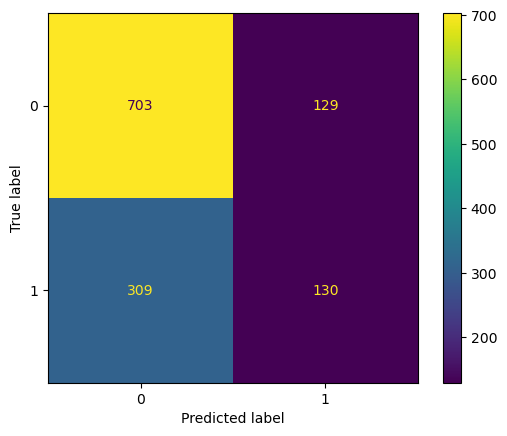

In [754]:
#cm = confusion_matrix(test['target'], y_pred)
cm = confusion_matrix(y_test, y_pred)
#labels = ['W', 'L']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()
plt.show()

### Adding more predictors - captain, referee and hour


In [755]:
#create new columns from captain and referee as categories
matches_rolling["cap"] = matches_rolling["captain"].astype("category").cat.codes
matches_rolling["ref"] = matches_rolling["referee"].astype("category").cat.codes

# function to create categories from hour.
# from 12 -> 16 == 0 | from 17->19 == 1| 20 and above == 2
def change(x):
    if x <= 16:
        x = 0
    elif x > 16 and x <= 19:
        x = 1
    else:
        x = 2
    return x

matches_rolling['hour_to_cat'] = matches_rolling['hour'].apply(change)

In [756]:
n_cols = ['cap', 'ref', 'hour_to_cat']  

In [757]:
derived_predictors = derived_predictors + n_cols
derived_predictors

['venue_code',
 'opp_code',
 'hour',
 'day_code',
 'team_code',
 'gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling',
 'cap',
 'ref',
 'hour_to_cat']

In [758]:
# train_pct = 0.7
# split_index = int(len(matches_rolling)*train_pct)

# train = matches_rolling[:split_index]        # 80%
# other = matches_rolling[split_index:]        #20%

# other_pct = 0.5
# split_index_two = int(len(other)*other_pct)

# test = other[:split_index_two]        # 50%
# val = other[split_index_two:]         #50%


In [759]:
X_train, X_test, y_train, y_test = train_test_split(matches_rolling[derived_predictors], matches_rolling['target'], test_size=0.3, random_state=101)

In [760]:

rf = RandomForestClassifier(n_estimators=15, max_features='sqrt',  random_state=101)  #min_samples_split=10,
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=101)

In [761]:
X_train.columns

Index(['venue_code', 'opp_code', 'hour', 'day_code', 'team_code', 'gf_rolling',
       'ga_rolling', 'sh_rolling', 'sot_rolling', 'dist_rolling', 'fk_rolling',
       'pk_rolling', 'pkatt_rolling', 'cap', 'ref', 'hour_to_cat'],
      dtype='object')

In [762]:
#predictions
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
acc = accuracy_score(y_test, y_pred)
acc

0.6530291109362707

In [763]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76       832
           1       0.50      0.33      0.40       439

    accuracy                           0.65      1271
   macro avg       0.60      0.58      0.58      1271
weighted avg       0.63      0.65      0.63      1271



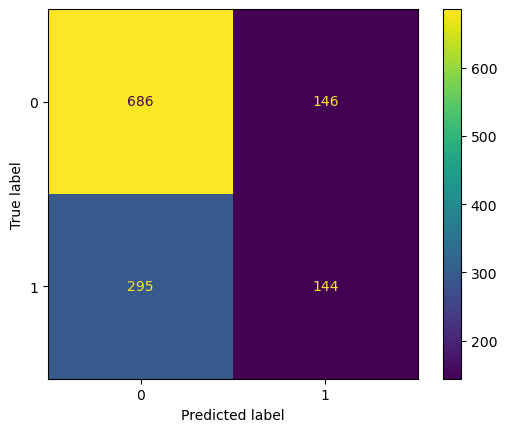

In [764]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()
plt.show()

In [765]:
rf.feature_importances_

array([0.03562188, 0.09923977, 0.05271798, 0.04926535, 0.08868671,
       0.06085256, 0.0628053 , 0.092135  , 0.07743691, 0.10856154,
       0.04430421, 0.01850267, 0.02284104, 0.08497306, 0.08223794,
       0.01981808])

In [766]:
from sklearn.model_selection import GridSearchCV 

n_estimators = [3, 6, 9, 12, 15]
max_features = [2, 3, 4]
bootstrap =[True, False]
oob_score = [True, False]

param_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'bootstrap': bootstrap,
} 

rf = RandomForestClassifier()
grid = GridSearchCV(rf, param_grid)

grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [3, 6, 9, 12, 15]})

In [767]:
grid.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 12}

In [768]:
rf = RandomForestClassifier(max_features=4, n_estimators=12, bootstrap=False) 
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features=4, n_estimators=12)

In [769]:
predictions = rf.predict(X_test)
# print(classification_report(predictions, test['target']))
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       997
           1       0.34      0.54      0.42       274

    accuracy                           0.67      1271
   macro avg       0.59      0.62      0.59      1271
weighted avg       0.74      0.67      0.70      1271



`NOTE`:Grid search helped increase accuracy by 3%

### 2. Gradient Boosting

In [770]:
#trying gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators': [5, 7, 9, 11],
             'learning_rate': [0.1, 0.05, 0.2],
             'max_depth': [3, 4, 5, 7, 7]}

gb_model = GradientBoostingClassifier(random_state=101)
grid = GridSearchCV(gb_model, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=101),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5, 7, 7],
                         'n_estimators': [5, 7, 9, 11]})

In [771]:
predictions = grid.predict(X_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80      1121
           1       0.23      0.69      0.35       150

    accuracy                           0.70      1271
   macro avg       0.59      0.69      0.58      1271
weighted avg       0.86      0.70      0.75      1271



## 3.  Logistic Regression

In [772]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=10000, random_state=101)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=101)

In [773]:
predictions = log_model.predict(X_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.89      0.69      0.77      1076
           1       0.23      0.52      0.32       195

    accuracy                           0.66      1271
   macro avg       0.56      0.60      0.55      1271
weighted avg       0.79      0.66      0.70      1271



In [775]:
param_grid = {'penalty': ['l2', 'l1', 'elasticnet'],
             'max_iter': [1000, 10000, 10000],
             'solver': ['liblinear', 'sag', 'saga']}

log_model = LogisticRegression()
grid = GridSearchCV(log_model, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [1000, 10000, 10000],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['liblinear', 'sag', 'saga']})

In [776]:
grid.best_params_

{'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}

In [777]:
log_model = LogisticRegression(
    max_iter = 1000,
    penalty = 'l2',
    solver = 'saga'
)

log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [778]:
predictions = log_model.predict(X_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.89      0.69      0.77      1075
           1       0.23      0.52      0.32       196

    accuracy                           0.66      1271
   macro avg       0.56      0.60      0.55      1271
weighted avg       0.79      0.66      0.70      1271



### 4. Support Vector Mechanics

In [779]:
from sklearn.svm import SVC

In [780]:
svc_model = SVC() #explore gamma with rbf. gamma is auto and scale
svc_model.fit(X_train, y_train)

SVC()

In [781]:
predictions = svc_model.predict(X_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79      1271
           1       0.00      0.00      0.00         0

    accuracy                           0.65      1271
   macro avg       0.50      0.33      0.40      1271
weighted avg       1.00      0.65      0.79      1271



In [864]:
set(predictions) - set(y_test)

set()

In [782]:
from sklearn.model_selection import GridSearchCV
svm_model = SVC()
param_grid = {"C":[0.01, 0.1, 1],
        "kernel":['linear', 'rbf', 'sigmoid'],
        }

In [783]:
grid = GridSearchCV(svm_model, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [784]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [785]:
svm_model = SVC(C=0.01, kernel='linear', random_state=101)
svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79      1271
           1       0.00      0.00      0.00         0

    accuracy                           0.65      1271
   macro avg       0.50      0.33      0.40      1271
weighted avg       1.00      0.65      0.79      1271



### 5. K Nearest Neighbors

In [786]:
from sklearn.neighbors import KNeighborsClassifier

In [787]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [788]:
predictions = knn_model.predict(X_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       788
           1       0.42      0.38      0.40       483

    accuracy                           0.57      1271
   macro avg       0.53      0.53      0.53      1271
weighted avg       0.56      0.57      0.56      1271



In [789]:
from sklearn.metrics import accuracy_score
test_error_rates =[]

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    predictions = knn_model.predict(X_test)

    test_error = 1 - accuracy_score(y_test, predictions)
    test_error_rates.append(test_error)



In [790]:
#test_error_rates


Text(0.5, 0, 'K Neighbors')

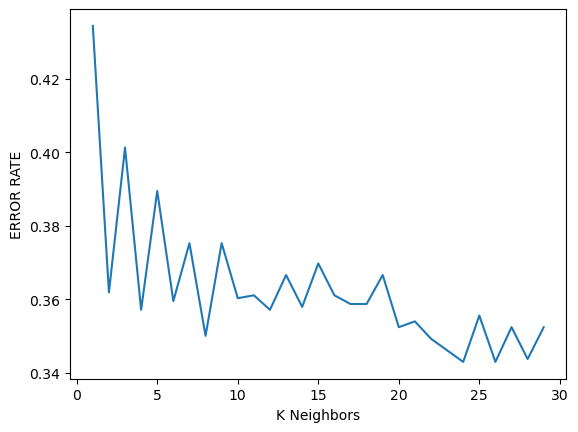

In [791]:
plt.plot(range(1, 30), test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

In [792]:
#GridSearch
k_values = list(range(1, 20))
param_grid = {'n_neighbors': k_values, 
                'metric':['minkowski', 'euclidean', 'cosine']}

full_cv_classifier = GridSearchCV(knn_model, param_grid, cv=5)
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['minkowski', 'euclidean', 'cosine'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]})

In [793]:
full_cv_classifier.best_params_

{'metric': 'minkowski', 'n_neighbors': 16}

In [794]:
predictions = full_cv_classifier.predict(X_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.85      0.68      0.75      1037
           1       0.24      0.46      0.32       234

    accuracy                           0.64      1271
   macro avg       0.55      0.57      0.54      1271
weighted avg       0.74      0.64      0.67      1271



### 6. Multinomial NB

In [795]:
from sklearn.naive_bayes import MultinomialNB

In [796]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [797]:
predictions = nb.predict(X_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74      1053
           1       0.20      0.40      0.27       218

    accuracy                           0.62      1271
   macro avg       0.52      0.54      0.51      1271
weighted avg       0.73      0.62      0.66      1271



### 7.  Decision Tree

In [798]:
from sklearn.tree import DecisionTreeClassifier
d_model = DecisionTreeClassifier()
d_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [799]:
predictions = d_model.predict(X_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68       769
           1       0.49      0.43      0.46       502

    accuracy                           0.60      1271
   macro avg       0.57      0.57      0.57      1271
weighted avg       0.59      0.60      0.59      1271



### 8. XGboost


In [800]:
from xgboost import XGBClassifier

In [801]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [802]:
predictions = xgb_model.predict(X_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       913
           1       0.41      0.51      0.45       358

    accuracy                           0.66      1271
   macro avg       0.60      0.61      0.60      1271
weighted avg       0.68      0.66      0.67      1271



### 9. LightGBM

In [803]:
from lightgbm import LGBMClassifier

In [804]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

LGBMClassifier()

In [805]:
predictions = lgbm_model.predict(X_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       954
           1       0.38      0.53      0.44       317

    accuracy                           0.67      1271
   macro avg       0.60      0.62      0.60      1271
weighted avg       0.71      0.67      0.68      1271



### 10.  ANN

In [806]:
import tensorflow as tf

In [807]:
predictors

['venue_code', 'opp_code', 'hour', 'day_code', 'team_code']

In [808]:
X = matches_rolling[derived_predictors]

In [809]:
X

,venue_code,opp_code,hour,day_code,team_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling,cap,ref,hour_to_cat
0,1,28,12,6,0,0.000000,1.333333,8.000000,3.000000,20.066667,0.666667,0.0,0.333333,55,31,0
1,0,15,21,2,0,0.000000,2.000000,10.666667,2.333333,20.533333,1.000000,0.0,0.000000,130,12,2
2,1,23,16,5,0,0.000000,1.666667,9.666667,2.666667,20.200000,0.333333,0.0,0.000000,130,2,0
3,0,18,18,5,0,0.333333,2.000000,10.666667,2.666667,21.233333,0.666667,0.0,0.000000,130,11,1
4,1,24,18,5,0,1.000000,1.000000,8.000000,3.000000,17.633333,0.666667,0.0,0.000000,130,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,0,19,18,5,28,0.333333,1.666667,12.333333,2.333333,17.900000,0.333333,0.0,0.000000,165,24,1
4231,1,11,21,0,28,1.000000,2.666667,11.000000,2.666667,17.933333,0.000000,0.0,0.000000,165,20,2
4232,0,1,16,5,28,1.333333,2.000000,10.000000,3.666667,17.800000,0.333333,0.0,0.000000,165,29,0
4233,1,5,18,6,28,2.000000,1.666667,12.000000,5.000000,16.966667,0.333333,0.0,0.000000,165,28,1


In [810]:
y = matches_rolling['result']

In [811]:
y

0       L
1       L
2       L
3       W
4       L
       ..
4230    L
4231    W
4232    W
4233    D
4234    W
Name: result, Length: 4235, dtype: object

In [812]:
y.unique()

array(['L', 'W', 'D'], dtype=object)

In [813]:
from sklearn.preprocessing import LabelBinarizer

In [814]:
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [815]:
y

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [816]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [817]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [818]:
model =  Sequential()
model.add(Dense(units=13, activation='relu', input_shape=[16,] ))
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [819]:
from tensorflow.keras.callbacks import EarlyStopping

In [820]:
early_stop = EarlyStopping(patience=10, monitor='val_loss')

In [821]:
model.fit(x=X, y=y, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/300
133/133 [==============================] - 1s 2ms/step - loss: 5.2818 - accuracy: 0.3183 - val_loss: 2.3147 - val_accuracy: 0.3660
Epoch 2/300
133/133 [==============================] - 0s 1ms/step - loss: 2.0370 - accuracy: 0.3556 - val_loss: 1.7252 - val_accuracy: 0.3589
Epoch 3/300
133/133 [==============================] - 0s 1ms/step - loss: 1.5344 - accuracy: 0.3589 - val_loss: 1.3335 - val_accuracy: 0.3707
Epoch 4/300
133/133 [==============================] - 0s 1ms/step - loss: 1.2832 - accuracy: 0.3681 - val_loss: 1.1978 - val_accuracy: 0.3979
Epoch 5/300
133/133 [==============================] - 0s 1ms/step - loss: 1.2092 - accuracy: 0.3877 - val_loss: 1.3235 - val_accuracy: 0.3566
Epoch 6/300
133/133 [==============================] - 0s 1ms/step - loss: 1.1723 - accuracy: 0.3953 - val_loss: 1.1380 - val_accuracy: 0.3967
Epoch 7/300
133/133 [==============================] - 0s 1ms/step - loss: 1.1393 - accuracy: 0.4059 - val_loss: 1.1202 - val_accuracy: 0.3861

In [822]:
metrics = pd.DataFrame(model.history.history)
metrics

<Axes: >

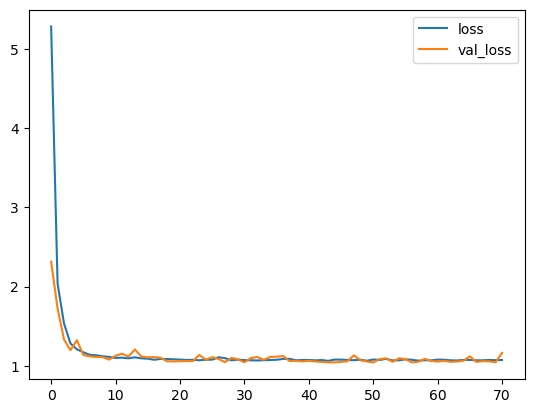

In [824]:
#comparing loss in training and validation set
metrics[['loss', 'val_loss']].plot()

<Axes: >

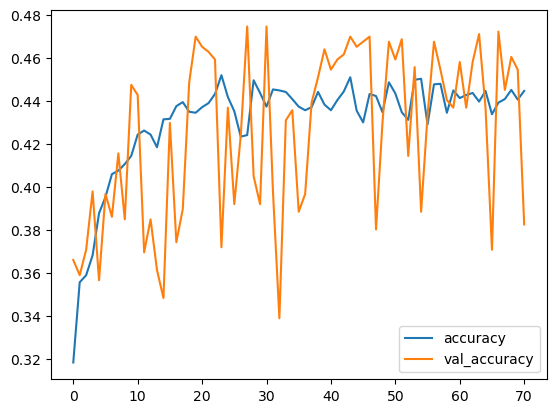

In [825]:
#comparing accuracy in training and validation set
metrics[['accuracy', 'val_accuracy']].plot()

In [826]:
model.evaluate(X_test, y_test, verbose=0)

[1.1647332906723022, 0.38252657651901245]

### Gradient Boosting has the highest accuracy

In [828]:
predictors

['venue_code', 'opp_code', 'hour', 'day_code', 'team_code']

In [829]:
derived_predictors

['venue_code',
 'opp_code',
 'hour',
 'day_code',
 'team_code',
 'gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling',
 'cap',
 'ref',
 'hour_to_cat']

In [835]:
X_train, X_other, y_train, y_other = train_test_split(matches_rolling[derived_predictors], matches_rolling['target'], test_size=0.2, random_state=101)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.5, random_state=101)

In [836]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape

((3388, 16), (423, 16), (424, 16), (3388,))

In [858]:
param_grid = {'n_estimators': [5, 7, 9, 11],
             'learning_rate': [0.1, 0.05, 0.2],
             'max_depth': [3, 4, 5, 7, 9],
             'max_features': ['auto', 'sqrt','log2']}

gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=101),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 7, 9, 11]})

In [859]:
grid.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 11}

### Final Model

In [860]:
final_model = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=9, max_features='auto')
final_model.fit(X_train, y_train)
predictions = final_model.predict(X_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.95      0.70      0.80       377
           1       0.21      0.67      0.32        46

    accuracy                           0.70       423
   macro avg       0.58      0.69      0.56       423
weighted avg       0.87      0.70      0.75       423



`NOTE` : After experimenting, model with initial predictors venue day team result in a 68% accuracy, the one without the rolling stats results in a 67% accuracy and the one with all the predictors result in a 70% accuracy.

In [861]:
#prediction on validation set

predictions = final_model.predict(X_val)
print(classification_report(predictions, y_val))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       373
           1       0.26      0.69      0.37        51

    accuracy                           0.72       424
   macro avg       0.60      0.71      0.60       424
weighted avg       0.86      0.72      0.77       424



Model performed well on validation set.

In [862]:
#training on all data
final_model = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=9, max_features='auto', random_state=101)
final_model.fit(matches_rolling[derived_predictors], matches_rolling['target'])

GradientBoostingClassifier(learning_rate=0.2, max_features='auto',
                           n_estimators=9, random_state=101)

## Saving the Model

In [865]:
import joblib

In [866]:
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

In [871]:
list(X.columns)

['venue_code',
 'opp_code',
 'hour',
 'day_code',
 'team_code',
 'gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling',
 'cap',
 'ref',
 'hour_to_cat']

In [872]:
joblib.dump(list(X.columns), 'col_names.pkl')

['col_names.pkl']

## LOADING THE MODEL

In [874]:
new_columns = joblib.load('col_names.pkl')

In [875]:
new_columns

['venue_code',
 'opp_code',
 'hour',
 'day_code',
 'team_code',
 'gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling',
 'cap',
 'ref',
 'hour_to_cat']

In [877]:
loaded_model = joblib.load('final_model.pkl')

In [878]:
#Testing out prediction
loaded_model.predict([[1, 28, 12, 6, 0, 0.000000, 1.333333, 8.000000, 3.000000, 20.066667, 0.666667, 0.0, 0.333333, 55, 31, 0]])

array([0])

## Summary

After exploring 10 models, it looks like the GradientBoosting had the highest accuracy about 70%. It looks like the model is efficient in predicting losses than wins. 

Other actions to improve model: <br>
- grab more data to balance Win, Draw and Loss outcomes. maybe like 10 seasons. <br>
- further hyperparameter turning for SVM, MultinomialNB <br>
- explore other features like attendance. This can be converted to categories. I can also explore the 'season' column. Also, xplore if teams partake in external competitions aside the premier league. eg. champions league. That can affect a team performance due to exhaustion. <br>